Saving climate_change_data.csv to climate_change_data (2).csv
=== Augmented Dickey-Fuller (ADF) Test Results ===
Temperature: ADF=-100.8747, p=0.0000
CO2 Emissions: ADF=-99.6286, p=0.0000
Sea Level Rise: ADF=-99.2354, p=0.0000
Precipitation: ADF=-69.3881, p=0.0000
Humidity: ADF=-97.5047, p=0.0000
Wind Speed: ADF=-72.3849, p=0.0000

Using manual lag order: 2


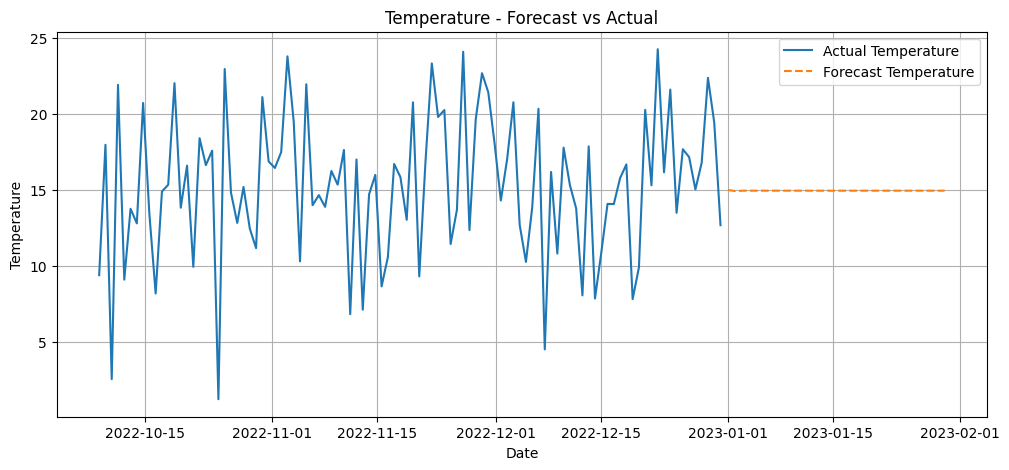

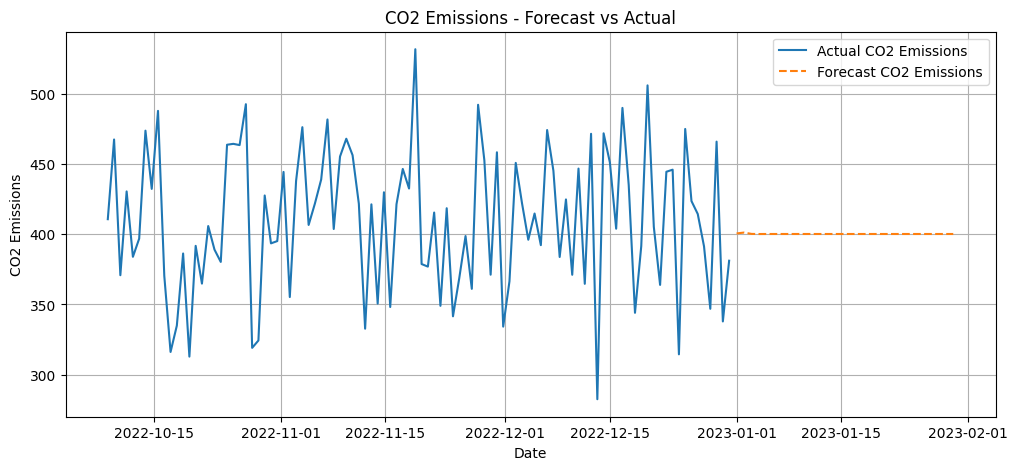

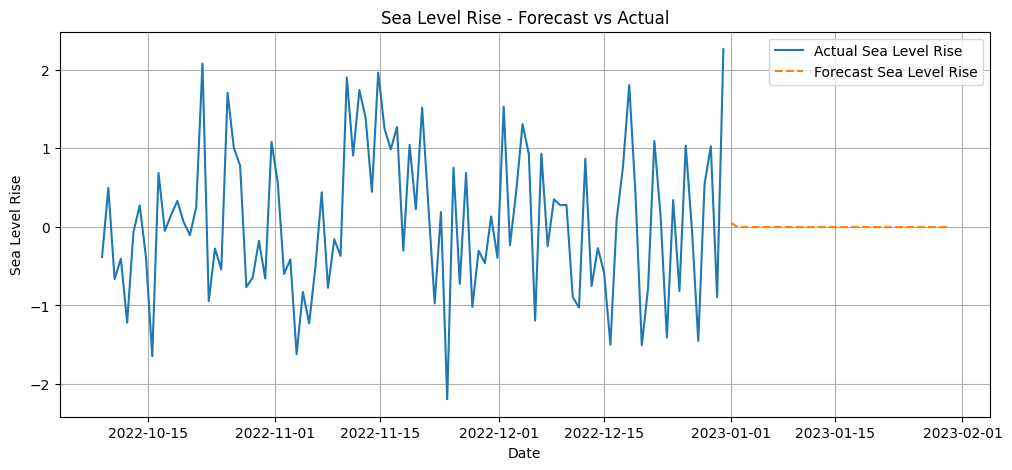

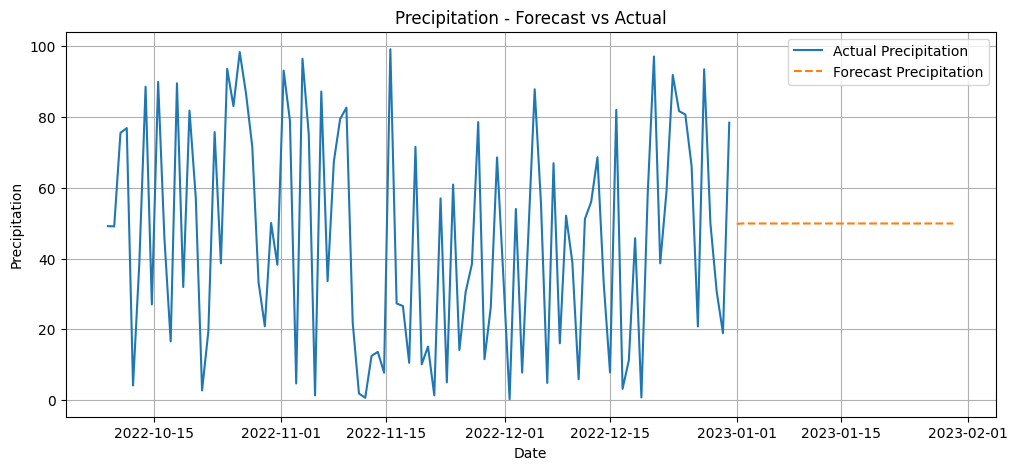

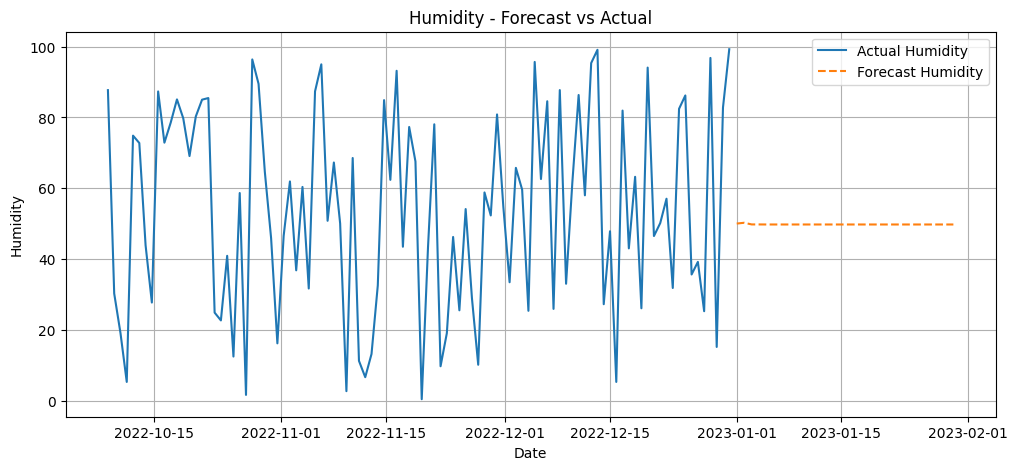

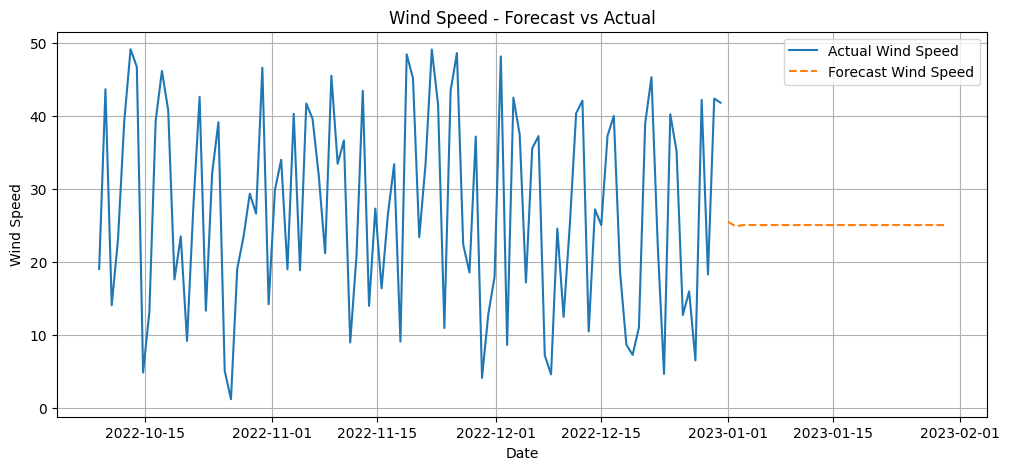

In [14]:
# STEP 1: Install Required Libraries
!pip install pandas statsmodels matplotlib

# STEP 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from google.colab import files

# STEP 3: Upload the Dataset
uploaded = files.upload()  # Upload 'climate_change_data.csv'

# STEP 4: Load and Preprocess Data
df = pd.read_csv('climate_change_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df = df.drop(columns=['Location', 'Country'])  # Drop non-numeric columns

# STEP 5: Check Stationarity Using ADF Test
def adf_test(series):
    result = adfuller(series)
    print(f"{series.name}: ADF={result[0]:.4f}, p={result[1]:.4f}")

print("=== Augmented Dickey-Fuller (ADF) Test Results ===")
for column in df.columns:
    adf_test(df[column])

# STEP 6: Fit the VAR Model with Manual Lag
manual_lag = 2  # Manually specified lag
model = VAR(df)
results = model.fit(manual_lag)
print(f"\nUsing manual lag order: {manual_lag}")

# STEP 7: Forecast Future Values
forecast_steps = 30  # Forecast 30 time steps into the future
forecast_input = df.values[-manual_lag:]
forecast = results.forecast(y=forecast_input, steps=forecast_steps)

# Create DataFrame for forecast
forecast_df = pd.DataFrame(forecast, columns=df.columns)
forecast_df.index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# STEP 8: Plot Forecast vs Actual
for col in df.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(df[col][-100:], label=f"Actual {col}")
    plt.plot(forecast_df[col], linestyle='--', label=f"Forecast {col}")
    plt.title(f"{col} - Forecast vs Actual")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()
